# MPA-MLF, Lab 2 - K-means

K-means is one of the most popular unsupervised machine learning algorithms, well known for its simplicity. This algorithm aims to separate unlabeled data into different clusters(subgroups) with the number of clusters represented by the variable *K*. Data points in the same cluster are very similar, while data points in different clusters are very different. The similarity of data is based on some similarity metric, where the similarity metric can be distance-based, correlation-based, etc. 

In our case, we will use distance-based metrics. Any distance-based metrics for numeric variables can be employed, for example: 
 - Euclidean distance
 - Manhattan distance
 - Cosine similarity


There is an example how K-means works:

1. Imagine you have a bunch of dots scattered on a piece of paper. These dots represent data points, and the goal of the k-means algorithm is to group similar dots into clusters

2. To start, you randomly select *k* dots from the scatter plot and assign each one to be the center of a cluster. These *k* dots are called centroids.

3. Then, you calculate the distance between each dot and each centroid and assign each dot to the closest centroid, effectively grouping the dots into k clusters.

4. Next, you recalculate the centroid of each cluster by finding the average position of all the dots in that cluster.

5. Repeat steps 3 and 4 until the centroids no longer change, meaning the clusters have stabilized.

6. Finally, the algorithm outputs the k clusters and the corresponding centroids.


In our case, we would use a Euclidian distance as a metric. Mathematically speaking, the goal would be to minimalize the following objective function:

![](img/objective.png)

where: 
   - *k* represents number of clusters (groups)
   - *m* represents number of points
   - u_k represents centroids
   - x_i represents data point
   - w_ik represents weight where wik=1 for data point xi if it belongs to cluster k; otherwise, wik=0.

There are some typical applications of using k-means:
- Customer Segmentation: k-means can segment customers based on their demographic information or purchase behavior. This information can then be used for targeted marketing or to improve the customer experience.

- Image Compression: k-means can reduce the number of colors in an image while preserving its visual quality. This is done by replacing similar color pixels with a single color, thereby reducing the amount of data required to represent the image.

- Anomaly Detection: k-means can be used to identify outliers or anomalies in a dataset by clustering similar data points and identifying data points far from the centroids of their respective clusters.

- Document Clustering: k-means can cluster documents based on their content, for example, to group news articles by topic or categorize customer support tickets.

- Market Segmentation: k-means can be used to segment a market based on customer characteristics, such as age, income, or spending habits, in order to identify subgroups of customers with similar needs or preferences.


Recomended sources:
 - https://towardsdatascience.com/log-book-guide-to-distance-measuring-approaches-for-k-means-clustering-f137807e8e21
 - https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1
 - https://realpython.com/k-means-clustering-python/
 - https://medium.com/@rishit.dagli/build-k-means-from-scratch-in-python-e46bf68aa875
 - https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
 - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

# Exercise 1 - K-means from scratch

## Implementing K-means

In this exercise, the task would be to implement a simple k-means algorithm from scratch, as described above. Let's rewrite the steps to be more readily implementable

### Steps:
  1. Specify the number of clusters *K*
  2. initialize centroids
  3. calculate the distance from centroids to all points in datasets
  4. calculate objective function
  5. assign data points to the closest centroids
  6. compute new centroids to the clusters by taking the average of all data points that belong to each cluster
  7. repeat steps 2-6. until there is no change in objective function or until the maximum n of iterations is reached


In [183]:
import matplotlib.pyplot as plt
import copy
import numpy as np
from numpy.linalg import norm
from sklearn.cluster import KMeans

### 0. Generate dataset

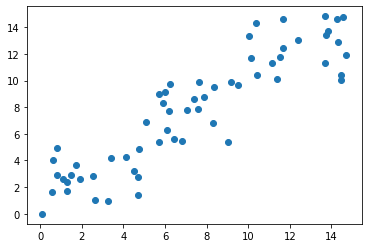

In [184]:
def split_points(points: np.array, n_of_point_groups: int) -> np.array:
    changed_points = copy.copy(points)
    index = np.arange(len(points))
    groups_index = np.split(index, n_of_point_groups)
    
    for id_group,group_index in enumerate(groups_index):
        changed_points[group_index] = points[group_index] + 5*id_group
    
    return changed_points
    

#generate points

n_of_points = 60
points = np.random.rand(n_of_points,2) * 5 
points = split_points(points, 3)

plt.figure()
plt.scatter(points[:,0],points[:,1])

### 1. Specify number of clusters *K*

In [185]:
k = 3

### 2. initialize centroids

There are more techniques, on how to change initial centroids. In out case, to initialize centroids we will take all available points and shuffle them randomly, then we will choose first *k* points as initial centroids

In [186]:
def initialize_clusters(points: np.array, k_clusters: int) -> np.array:
    vector = np.arange(points.shape[0])
    vector = np.random.permutation(vector)
    indexes = vector[:k_clusters]
    return points[indexes]

centroids = initialize_clusters(points=points, k_clusters=k)

### 3. Calculate distance from centroids to all points in datasets

3.1 Firstly we need to specify a function to calculate the distance between points, we can un an arbitrary metric, in this exercise, we will use Euclidian distance.

In [187]:
def calculate_metric(points: np.array, centroid: np.array) -> np.array:
    return np.square(norm(points - centroid, axis=1))


3.2 Secondly we need to specify function to calculate distance between points and all centroids using metric from 3.1

In [188]:
def compute_distances(points: np.array, centroids_points: np.array) -> np.array:
    return np.array([calculate_metric(points, centroid) for centroid in centroids])

compute_distances(points, centroids)

array([[ 44.75669402, 121.04702167, 105.38526648, 179.96268054,
        107.88513419,  92.63460999, 118.27776084,  66.57986225,
        118.00520523,  93.93997035, 118.68821946,  93.90381376,
        107.26126698, 129.27826322, 114.9394942 , 142.3624335 ,
         94.5452813 ,  66.16164236,  71.2315512 ,  56.78564611,
          0.84476321,  10.39336029,  25.0920892 ,   9.0052845 ,
          8.61193074,   2.39327638,  13.76427068,  12.69380283,
         20.32672093,  13.00825972,  22.69664893,  25.60122169,
          2.88679282,  10.43797594,   4.72200302,  32.30713015,
          0.1805371 ,   0.        ,  25.83367624,   6.66874846,
         27.9272363 ,   5.0117102 ,   4.21005977,  36.28315439,
         20.71859794,  44.36835503,   1.86598751,  47.8618626 ,
         33.01097054,  28.13263108,  35.01722678,  22.56377002,
         12.35568461,   6.04904225,  19.96887831,  28.50499937,
         12.62146969,  52.41256583,  35.36145825,   8.94649874],
       [ 16.3373602 ,  65.27452028,  58

### 4. Calculate objective function

In [189]:
def calculate_objective(cluster_belongs: np.array, distances: np.array) -> np.array:
    distances = distances.T
    minimum =  distances[np.arange(len(distances)), cluster_belongs]
    return np.sum(minimum)

### 5. Assign datapoints to the closest centroids

In [190]:
def assign_centroids(distances: np.array):
    return np.argmin(distances, axis=0)

### 6. Compute new controids to the clusters by taking the average of the all data points that belong to each cluster

In [191]:
def calculate_new_centroids(points: np.array, clusters_belongs: np.array, n_of_clusters: int) -> np.array:
    new_centroids = []
    for cluster in range(n_of_clusters):
        indexes = np.where(clusters_belongs == cluster)
        new_centroids.append(np.mean(points[indexes], axis=0))

    
    return np.array(new_centroids)

###   7. repeat steps 2-6. until there is no change in objective function or until the maximum n of iterations is reached

In [192]:
def fit(points: np.array, n_of_centroids: int, n_of_oterations: int, error: float = 0.001) -> tuple:
    centroid_points = initialize_clusters(points, n_of_centroids)
    last_objective = 10000

    for i in range(n_of_oterations):
        distances = compute_distances(points, centroid_points)
        cluster_belongs = assign_centroids(distances)
        
        objective = calculate_objective(cluster_belongs, distances)
        if abs(last_objective - objective) < error:
            break
        last_objective = objective

        centroid_points = calculate_new_centroids(points, cluster_belongs, n_of_centroids)


    return centroid_points, last_objective

### All together

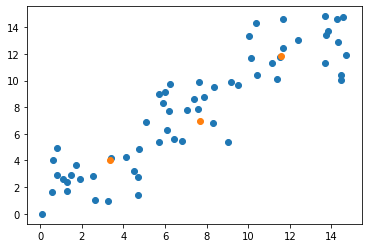

In [193]:
n_of_iterations = 100

centroids, last_obj = fit(points, 30, n_of_iterations)

plt.figure()
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1])

*Tip: since the initial clusters are selected randomly, the algorithm can lead to different result, so to obtain the best results, it is helpful to run the algorithm multiple times and select result with the lowest objective function*

# Evaluation methods - How to determine *k*?

One of the disadvantages of using k-means is that it requires a number of centroids as an input, at it is not that usually that obvious, there are some methods exist to choose the right number of centroids at the beginning. In this part of a lecture we would describe two methods to choose the right *k* value, *Elbow method* and *Silhouette analysis*

## Elbow method

The Elbow Method is a technique used in determining the optimal number of clusters for k-means clustering. The basic idea is to plot the explained variation as a function of the number of clusters and pick the elbow of the curve as the number of clusters to use. In the picture below you can see that the best *k* value is 3

![](img/elbow_sc.png)  ![](img/elbow_chart.png)

The main advantage of this method that its very simple and easy to implement, on the other hand sometimes it is not very clear where the elbow is

## Silhouette analysis

Silhouette analysis is a method to evaluate the quality of clustering results by measuring how similar each data point is to its own cluster compared to other clusters. A high silhouette score indicates that the data points in a cluster are well-separated from other clusters and that the clustering solution is good.

The silhouette score can be calculated using the following formula. This measure has a range of [-1, 1] and it is calculated for each sample in the dataset

![](img/sil_score.png)

where:
 - a_i represents the average distance of that point with all other points in the same clusters
 - b_i represents the average distance of that point with all the points in the closest cluster to its cluster

if
 - is 0 –> the sample is very close to the neighboring clusters.
 - is 1 –> the sample is far away from the neighboring clusters.
 - is -1 –> the sample is assigned to the wrong clusters.

## Exercise 2 - Implementing an Elbow Method

Implementing an elbow method is simple, 
 1. Create a vector of possible *k* values
 2. Fit your data using different *k* values and save the objective function value
 3. Plot objective function values in terms of *k* values
 4. Find an elbow

In [194]:
# points = np.random.rand(n_of_points,2) * 5
# points = split_points(points, 3)

k_all = range(2, 100)
all_objective = []

for i in k_all:
    _, obj = fit(points, i, n_of_iterations)
    all_objective.append(obj)

## WRITE YOUR CODE HERE

Text(0, 0.5, 'Sum of squared distance')

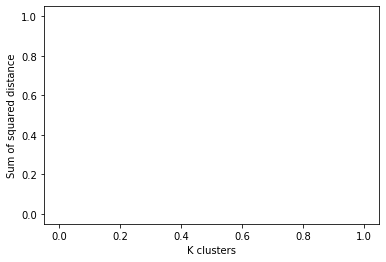

In [195]:
plt.figure()
plt.plot(k_all, all_objective)
plt.xlabel('K clusters')
plt.ylabel('Sum of squared distance')

# Exercise 3 - Image Compression

In this exercise, the task would be to implement simple image compression using the k-means algorithm. You can use an image in the directory *Data\\*. This time, we will use a library that implements k-means for us - *sklearn* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html. To load the image you can use *openCv* or *matplotlib* (or anything else)

### Steps

    1. Firstly reshape your image to 2D array with shape (image.width*image.height, n_of_colour_channels)
    2. Initialize the K_means algorithm, where K would be equal to the number of colors in the compressed image
    3. check cluster centroids and convert them to integers - these are your new colors (kmeans.cluster_centers_ could be useful)
    4. replace your 2D arrays colors with newly generated colors
    5. reshape your 2D array to the original image shape

Tips:
- it takes a couple of seconds to compress the attached image, you can work on your algorithm using different (smaller) image
- the implementation can be done in single function

In [196]:
from matplotlib.image import imread
from sklearn.cluster import KMeans
import numpy as np

### 1. load image

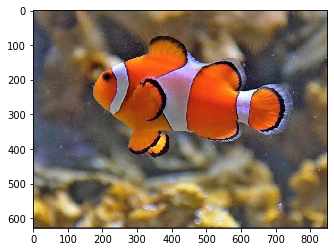

In [197]:
loaded_image = imread('Data/fish.jpg')

plt.imshow(loaded_image)
plt.show()

In [208]:
def compress_image(image: np.array, number_of_colours: int) -> np.array:
    shape = image.shape

    reshaped = np.reshape(image, (image.shape[0]*image.shape[1],image.shape[2]))
    kmeans = KMeans(n_clusters=number_of_colours, random_state=0).fit(reshaped)

    labels = kmeans.labels_
    colors = kmeans.cluster_centers_.astype('uint8')
    
    transformed_image = colors[labels].reshape(shape)

    return transformed_image


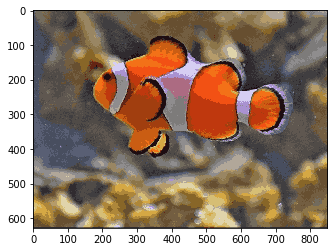

In [207]:
img = compress_image(loaded_image, 30)

plt.figure()
plt.imshow(img)
plt.show()